In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import seaborn as sns

In [4]:
holidays = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\holidays_events.csv')
oil = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\oil.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\sample_submission.csv')
stores = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\stores.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\test.csv')
train = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\train.csv') #3000888 
#transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\transactions.csv')
transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\transactions3.csv')


## feature selection을 위한 데이터셋 생성: temp

In [5]:
temp = pd.merge(train, stores, how= 'inner', on='store_nbr') # 3000888 

In [7]:
transactions['store_nbr'] = transactions['store_nbr'].astype(int).astype(str)

In [8]:
temp['store_nbr'] = temp['store_nbr'].astype(int).astype(str)

In [9]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [10]:
temp['date'] = pd.to_datetime(temp['date'])

In [11]:
temp = pd.merge(temp, transactions, how='inner', on=['date', 'store_nbr'])

## onpromotion lag

In [13]:
for lag in [1, 2, 5, 10]:
    temp[f'onpromotion_lag{lag}'] = temp['onpromotion'].shift(lag).fillna(0)

In [14]:
temp

id       date store_nbr                      family     sales  \
0              0 2013-01-01         1                  AUTOMOTIVE     0.000   
1              1 2013-01-01         1                   BABY CARE     0.000   
2              2 2013-01-01         1                      BEAUTY     0.000   
3              3 2013-01-01         1                   BEVERAGES     0.000   
4              4 2013-01-01         1                       BOOKS     0.000   
...          ...        ...       ...                         ...       ...   
3000883  3000883 2017-08-15         9                     POULTRY   438.133   
3000884  3000884 2017-08-15         9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15         9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15         9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15         9                     SEAFOOD    16.000   

         onpromotion   city      state type  cluster  transactions  \
0                  0  Quito  Pichincha    D       13           0.0   
1                  0  Quito  Pichincha    D       13           0.0   
2                  0  Quito  Pichincha    D       13           0.0   
3                  0  Quito  Pichincha    D       13           0.0   
4                  0  Quito  Pichincha    D       13           0.0   
...              ...    ...        ...  ...      ...           ...   
3000883            0  Quito  Pichincha    B        6        2155.0   
3000884            1  Quito  Pichincha    B        6        2155.0   
3000885          148  Quito  Pichincha    B        6        2155.0   
3000886            8  Quito  Pichincha    B        6        2155.0   
3000887            0  Quito  Pichincha    B        6        2155.0   

        day_of_week  onpromotion_lag1  onpromotion_lag2  onpromotion_lag5  \
0           Tuesday               0.0               0.0               0.0   
1           Tuesday               0.0               0.0               0.0   
2           Tuesday               0.0               0.0               0.0   
3           Tuesday               0.0               0.0               0.0   
4           Tuesday               0.0               0.0               0.0   
...             ...               ...               ...               ...   
3000883     Tuesday               0.0               0.0               0.0   
3000884     Tuesday               0.0               0.0               0.0   
3000885     Tuesday               1.0               0.0              11.0   
3000886     Tuesday             148.0               1.0               0.0   
3000887     Tuesday               8.0             148.0               0.0   

         onpromotion_lag10  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
3000883                6.0  
3000884                0.0  
3000885                3.0  
3000886                0.0  
3000887                2.0  

[3000888 rows x 16 columns]

### oil

In [15]:
oil['date'] = pd.to_datetime(oil['date'])
temp = pd.merge(temp, oil, how='left', on='date')
# 결측값 보간 (interpolation)
temp['oil_price'] = temp['dcoilwtico'].fillna(method='ffill')
# 결측값 보간 (interpolation)
temp['oil_price'] = temp['dcoilwtico'].fillna(method='bfill')
temp.drop(columns=['dcoilwtico'], inplace=True)

In [43]:
temp[(temp['store_nbr']=='1')&(temp['family']=='AUTOMOTIVE')].head(100)

id       date store_nbr      family  sales  onpromotion   city  \
0          0 2013-01-01         1  AUTOMOTIVE    0.0            0  Quito   
33      1782 2013-01-02         1  AUTOMOTIVE    2.0            0  Quito   
66      3564 2013-01-03         1  AUTOMOTIVE    3.0            0  Quito   
99      5346 2013-01-04         1  AUTOMOTIVE    3.0            0  Quito   
132     7128 2013-01-05         1  AUTOMOTIVE    5.0            0  Quito   
...      ...        ...       ...         ...    ...          ...    ...   
3135  169290 2013-04-06         1  AUTOMOTIVE    2.0            0  Quito   
3168  171072 2013-04-07         1  AUTOMOTIVE    0.0            0  Quito   
3201  172854 2013-04-08         1  AUTOMOTIVE    3.0            0  Quito   
3234  174636 2013-04-09         1  AUTOMOTIVE    4.0            0  Quito   
3267  176418 2013-04-10         1  AUTOMOTIVE    3.0            0  Quito   

          state type  cluster  transactions day_of_week  dcoilwtico  oil_price  
0     Pichincha    D       13           0.0     Tuesday         NaN        NaN  
33    Pichincha    D       13        2111.0   Wednesday       93.14      93.14  
66    Pichincha    D       13        1833.0    Thursday       92.97      92.97  
99    Pichincha    D       13        1863.0      Friday       93.12      93.12  
132   Pichincha    D       13        1509.0    Saturday         NaN      93.12  
...         ...  ...      ...           ...         ...         ...        ...  
3135  Pichincha    D       13        1349.0    Saturday         NaN      92.76  
3168  Pichincha    D       13         521.0      Sunday         NaN      92.76  
3201  Pichincha    D       13        1824.0      Monday       93.36      93.36  
3234  Pichincha    D       13        1744.0     Tuesday       94.18      94.18  
3267  Pichincha    D       13        1916.0   Wednesday       94.59      94.59  

[100 rows x 14 columns]

### earthquake

In [ ]:
# 지진 일어난 날 feature로 넣어줌
https://www.worlddata.info/america/ecuador/earthquakes.php
https://es.wikipedia.org/wiki/Terremoto_de_Ecuador_de_2016
https://www.usaid.gov/sites/default/files/2022-05/ecuador_eq_fs03_04-29-2016_0.pdf

In [19]:
earthquake = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\earthquake.csv')

In [20]:
earthquake['date'] = pd.to_datetime(earthquake['date'])

In [22]:
temp = pd.merge(temp, earthquake, how='left', on=['date','state'])

In [23]:
# 결측치 처리
temp['magnitude'].fillna(0, inplace=True)
temp['deaths'].fillna(0, inplace=True)

In [25]:
temp.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv', index=False)

In [26]:
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv') #3000888 

### holidays

In [27]:
# local == city
# Regional == state

Local_holidays = holidays[(holidays['locale']=='Local')& (holidays['transferred']==False) & (holidays['type']!='Event')]
Regional_holidays = holidays[(holidays['locale']=='Regional')& (holidays['transferred']==False) & (holidays['type']!='Event')]
National_holidays = holidays[(holidays['locale']=='National')& (holidays['transferred']==False) & (holidays['type']!='Event')]
Event_holidays = holidays[(holidays['type']=='Event')& (holidays['transferred']==False)]

In [28]:
Local_holidays['description'] = 1
Regional_holidays['description'] = 1
National_holidays['description'] = 1
Event_holidays['description'] = 1

C:\Users\user\AppData\Local\Temp\ipykernel_36844\3759092004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local_holidays['description'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_36844\3759092004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regional_holidays['description'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_36844\3759092004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [29]:
Local_holidays.drop(columns=['type','locale','transferred'],inplace=True)
Regional_holidays.drop(columns=['type','locale','transferred'],inplace=True)
National_holidays.drop(columns=['type','locale','transferred'],inplace=True)
Event_holidays.drop(columns=['type','locale','transferred'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_36844\93990026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local_holidays.drop(columns=['type','locale','transferred'],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_36844\93990026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regional_holidays.drop(columns=['type','locale','transferred'],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_36844\93990026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [30]:
Local_holidays.drop_duplicates(inplace=True)
Regional_holidays.drop_duplicates(inplace=True)
National_holidays.drop_duplicates(inplace=True)
Event_holidays.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_36844\2142247382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local_holidays.drop_duplicates(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_36844\2142247382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regional_holidays.drop_duplicates(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_36844\2142247382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  National_h

In [31]:
Local_holidays.reset_index(drop=True, inplace=True)
Regional_holidays.reset_index(drop=True, inplace=True)
National_holidays.reset_index(drop=True, inplace=True)
Event_holidays.reset_index(drop=True, inplace=True)

In [32]:
temp = pd.merge(temp, Local_holidays, left_on=['date','city'], right_on=['date','locale_name'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'local_holiday'})
temp['local_holiday'] = temp['local_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [33]:
temp = pd.merge(temp, Regional_holidays, left_on=['date','state'], right_on=['date','locale_name'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'regional_holiday'})
temp['regional_holiday'] = temp['regional_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [34]:
temp = pd.merge(temp, National_holidays, left_on=['date'], right_on=['date'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'national_holiday'})
temp['national_holiday'] = temp['national_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [35]:
temp = pd.merge(temp, Event_holidays, left_on=['date'], right_on=['date'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'event_holiday'})
temp['event_holiday'] = temp['event_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [36]:
temp.shape[0]

3000888

In [37]:
temp.drop(columns=['id'], inplace=True)

In [45]:
temp.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv', index=False)

In [ ]:
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv') #3000888 

## Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.  

In [39]:
temp['date'] = pd.to_datetime(temp['date'])

In [40]:
month_end_dates  = pd.date_range(start='2013-01-01', end='2017-08-15', freq='M')

temp['wage15th'] = temp['date'].apply(lambda x: 1 if (x.day == 15) else 0)
temp['wagelastday'] = temp['date'].apply(lambda x: 1 if (x in month_end_dates) else 0)

## year month day

In [43]:
temp['year'] = temp['date'].dt.year
temp['month'] = temp['date'].dt.month
temp['day'] = temp['date'].dt.day

seasons = {'Winter': [12, 1, 2], 'Spring': [3, 4, 5], 'Summer': [6, 7, 8], 'Autumn': [9, 10, 11]}
temp['season'] = temp['month'].map({month: season for season, months in seasons.items() for month in months})

temp['quarter'] = temp['date'].dt.quarter
temp['week_of_year'] = temp['date'].dt.isocalendar().week

In [ ]:
temp.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv', index=False)

## 요일별 연평균 매출, 요일별 연평균 품목 매출 추가안함

In [ ]:
# 상점별, 카테고리별 매출 합계 계산
pivot_df = temp_2016[['date','store_nbr','family','sales']].pivot_table(index='store_nbr', columns='family', values='sales', aggfunc='sum', fill_value=0)

In [ ]:
unique_families = list(set(temp['family']))

for i in range(1, 55):
    for j in unique_families:
        
        # 요일별 연평균 매출 계산
        average_sales_by_day = globals()[f'S{i:02d}_{j}'].groupby('day_of_week')['sales'].mean().to_dict()

        # 요일별 연평균 품목 매출 계산
        average_sales_by_day_family = globals()[f'S{i:02d}_{j}'].groupby(['day_of_week', 'family'])['sales'].mean().unstack().fillna(0).to_dict()

        # 데이터셋에 특징 추가
        globals()[f'S{i:02d}_{j}']['average_sales_by_day'] = globals()[f'S{i:02d}_{j}']['day_of_week'].map(average_sales_by_day)
        globals()[f'S{i:02d}_{j}']['average_sales_by_day_family'] = globals()[f'S{i:02d}_{j}'].apply(lambda row: average_sales_by_day_family.get((row['day_of_week'], row['family']), 0), axis=1)




## cluster 찾기

## rolling 변수

In [36]:
temp['date'] = pd.to_datetime(temp['date'])
temp_201520162017 = temp[temp['date'].dt.year.isin([2015,2016,2017])]

In [25]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [26]:
unique_families = list(set(temp['family']))
print(unique_families)

['LIQUOR,WINE,BEER', 'PREPARED FOODS', 'HOME AND KITCHEN II', 'POULTRY', 'LADIESWEAR', 'EGGS', 'HOME APPLIANCES', 'BOOKS', 'PRODUCE', 'PLAYERS AND ELECTRONICS', 'DELI', 'MEATS', 'CLEANING', 'LAWN AND GARDEN', 'BABY CARE', 'CELEBRATION', 'BREAD/BAKERY', 'BEAUTY', 'PERSONAL CARE', 'HARDWARE', 'BEVERAGES', 'LINGERIE', 'PET SUPPLIES', 'MAGAZINES', 'SCHOOL AND OFFICE SUPPLIES', 'DAIRY', 'SEAFOOD', 'AUTOMOTIVE', 'FROZEN FOODS', 'GROCERY I', 'HOME AND KITCHEN I', 'GROCERY II', 'HOME CARE']


In [38]:
data_frames = []

#for i in range(1, 2):
for i in range(1, 55):
    for j in unique_families:
    #for j in ['MEATS']:
        filtered_df = temp_201520162017[(temp_201520162017['store_nbr'] == i) & (temp_201520162017['family'] == j)]
        
        filtered_df['slope7'] = filtered_df['sales'].rolling(7).apply(get_slope, raw=True)

        filtered_df['std7'] = filtered_df['sales'].rolling(7).std(raw=True)

        filtered_df['mean7'] = filtered_df['sales'].rolling(7).mean(raw=True)

        filtered_df['skew7'] = filtered_df['sales'].rolling(7).skew()

        filtered_df['kurt7'] = filtered_df['sales'].rolling(7).kurt()

        filtered_df['min7'] = filtered_df['sales'].rolling(7).min()

        filtered_df['max7'] = filtered_df['sales'].rolling(7).max()
        
        
        if not filtered_df.empty:
            data_frames.append(filtered_df)

# 모든 DataFrame을 하나로 결합
rfd = pd.concat(data_frames, ignore_index=True)

print(rfd)

C:\Users\user\AppData\Local\Temp\ipykernel_1424\2909540829.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['slope7'] = filtered_df['sales'].rolling(7).apply(get_slope, raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1424\2909540829.py:11: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  filtered_df['std7'] = filtered_df['sales'].rolling(7).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1424\2909540829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

              date  store_nbr            family  sales  onpromotion  \
0       2015-01-01          1  LIQUOR,WINE,BEER    0.0            0   
1       2015-01-02          1  LIQUOR,WINE,BEER   89.0            0   
2       2015-01-03          1  LIQUOR,WINE,BEER  106.0            0   
3       2015-01-04          1  LIQUOR,WINE,BEER    0.0            0   
4       2015-01-05          1  LIQUOR,WINE,BEER  104.0            0   
...            ...        ...               ...    ...          ...   
1703587 2017-08-11         54         HOME CARE  163.0            6   
1703588 2017-08-12         54         HOME CARE  234.0            6   
1703589 2017-08-13         54         HOME CARE  306.0            6   
1703590 2017-08-14         54         HOME CARE  175.0            5   
1703591 2017-08-15         54         HOME CARE  202.0            7   

              city      state type  cluster  transactions  ...  season  \
0            Quito  Pichincha    D       13           0.0  ...  Winter   

In [40]:
temp2 = rfd.dropna()

In [39]:
temp2.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp2.csv',index=False)

In [17]:
temp2 = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp2.csv')

In [76]:
temp2

date  store_nbr            family  sales  onpromotion  \
0        2015-01-07          1  LIQUOR,WINE,BEER   85.0            0   
1        2015-01-08          1  LIQUOR,WINE,BEER  127.0            0   
2        2015-01-09          1  LIQUOR,WINE,BEER  129.0            0   
3        2015-01-10          1  LIQUOR,WINE,BEER  191.0            0   
4        2015-01-11          1  LIQUOR,WINE,BEER    0.0            0   
...             ...        ...               ...    ...          ...   
1692895  2017-08-11         54         HOME CARE  163.0            6   
1692896  2017-08-12         54         HOME CARE  234.0            6   
1692897  2017-08-13         54         HOME CARE  306.0            6   
1692898  2017-08-14         54         HOME CARE  175.0            5   
1692899  2017-08-15         54         HOME CARE  202.0            7   

              city      state type  cluster  transactions day_of_week  \
0            Quito  Pichincha    D       13        1989.0   Wednesday   
1            Quito  Pichincha    D       13        1837.0    Thursday   
2            Quito  Pichincha    D       13        1925.0      Friday   
3            Quito  Pichincha    D       13        1534.0    Saturday   
4            Quito  Pichincha    D       13         507.0      Sunday   
...            ...        ...  ...      ...           ...         ...   
1692895  El Carmen     Manabi    C        3         768.0      Friday   
1692896  El Carmen     Manabi    C        3         903.0    Saturday   
1692897  El Carmen     Manabi    C        3        1054.0      Sunday   
1692898  El Carmen     Manabi    C        3         818.0      Monday   
1692899  El Carmen     Manabi    C        3         802.0     Tuesday   

         oil_price  magnitude  deaths  local_holiday  regional_holiday  \
0            48.69        0.0     0.0              0                 0   
1            48.80        0.0     0.0              0                 0   
2            48.35        0.0     0.0              0                 0   
3            46.06        0.0     0.0              0                 0   
4            46.06        0.0     0.0              0                 0   
...            ...        ...     ...            ...               ...   
1692895      48.81        0.0     0.0              0                 0   
1692896      47.59        0.0     0.0              0                 0   
1692897      47.59        0.0     0.0              0                 0   
1692898      47.59        0.0     0.0              0                 0   
1692899      47.57        0.0     0.0              0                 0   

         national_holiday  event_holiday  wage  year  month  day  \
0                       0              0     0  2015      1    7   
1                       0              0     0  2015      1    8   
2                       0              0     0  2015      1    9   
3                       1              0     0  2015      1   10   
4                       0              0     0  2015      1   11   
...                   ...            ...   ...   ...    ...  ...   
1692895                 1              0     0  2017      8   11   
1692896                 0              0     0  2017      8   12   
1692897                 0              0     0  2017      8   13   
1692898                 0              0     0  2017      8   14   
1692899                 0              0     1  2017      8   15   

         onpromotion_lag1  onpromotion_lag2  onpromotion_lag5  \
0                     0.0               2.0               0.0   
1                     0.0               0.0               0.0   
2                     0.0               0.0               0.0   
3                     0.0               0.0               0.0   
4                     0.0               0.0               0.0   
...                   ...               ...               ...   
1692895               0.0               0.0               0.0   
1692896               0.0               0.0    

# feature engineering

각 방법의 장단점
One-Hot Encoding:

장점: 요일 간의 순서나 크기 관계를 전혀 나타내지 않으므로, 각 요일이 독립적이라고 가정할 때 적합합니다.
단점: 7개의 요일에 대해 7개의 열이 추가되어 차원이 증가합니다.
Binary Encoding:

장점: 많은 범주를 효율적으로 인코딩할 수 있습니다.
단점: 요일의 순서를 반영하지 않습니다.
Ordinal Encoding:

장점: 요일 간의 순서를 모델에 전달할 수 있습니다.
단점: 모델이 요일 간의 순서를 잘못 해석할 수 있습니다.
결론
어떤 인코딩 방법을 사용할지는 데이터의 특성과 머신러닝 모델의 요구사항에 따라 달라집니다. 일반적으로 요일 정보는 One-Hot Encoding을 사용하는 것이 가장 흔한 방법입니다. 하지만 데이터의 성격에 따라 Ordinal Encoding이나 Binary Encoding도 고려해볼 수 있습니다. 여러 방법을 시도해 보고, 모델 성능을 평가하여 가장 적합한 방법을 선택하는 것이 좋습니다.

## one-hot encoder -> BinaryEncoder : 차원이 너무 많아서 BinaryEncoder로 변경

store_nbr, family, city, state, type, cluster, day_of_week, season

In [ ]:
city, state -> 제외

In [110]:
df.drop(columns=['city','state'], inplace=True)

### one-hot encoding
day_of_week, season / store_nbr, family, type, cluster,

In [109]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
df_encoded = onehot_encoder.fit_transform(df[['season']])
# One-Hot 인코딩 결과를 데이터프레임으로 변환하고 기존 데이터프레임에 병합
df_onehot = pd.DataFrame(df_encoded, columns=onehot_encoder.get_feature_names_out(['season']), index=df.index)
df = pd.concat([df, df_onehot], axis=1)
df.drop(columns=['season'], inplace=True)

print(df)

               date  sales  onpromotion       city      state  transactions  \
0        2015-01-07   85.0            0      Quito  Pichincha        1989.0   
1        2015-01-08  127.0            0      Quito  Pichincha        1837.0   
2        2015-01-09  129.0            0      Quito  Pichincha        1925.0   
3        2015-01-10  191.0            0      Quito  Pichincha        1534.0   
4        2015-01-11    0.0            0      Quito  Pichincha         507.0   
...             ...    ...          ...        ...        ...           ...   
1692895  2017-08-11  163.0            6  El Carmen     Manabi         768.0   
1692896  2017-08-12  234.0            6  El Carmen     Manabi         903.0   
1692897  2017-08-13  306.0            6  El Carmen     Manabi        1054.0   
1692898  2017-08-14  175.0            5  El Carmen     Manabi         818.0   
1692899  2017-08-15  202.0            7  El Carmen     Manabi         802.0   

         oil_price  magnitude  deaths  local_holida

In [111]:
df.columns

Index(['date', 'sales', 'onpromotion', 'transactions', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday',
       ...
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object', length=148)

### bianry encoding
일단 안함

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

# BinaryEncoder 생성 및 적용
binary_encoder = ce.BinaryEncoder(cols=['family'])
df_encoded = binary_encoder.fit_transform(df)
df_onehot = pd.DataFrame(df_encoded, columns=binary_encoder.get_feature_names_out(['family']), index=df.index)
df = pd.concat([df, df_encoded], axis=1) 
df.drop(columns=['family'], inplace=True)
print(df)

In [34]:
#결과에서 알 수 있듯이, Binary Encoding을 사용한 경우 모델의 정확도가 훨씬 높았습니다. 
# 이는 family 컬럼이 범주형 데이터로 잘 인코딩되었을 때 모델이 더 잘 학습하고 예측할 수 있다는 것을 의미합니다. 
# 반면, family 컬럼을 그대로 사용했을 때는 모델이 데이터를 제대로 학습하지 못했습니다.

import pandas as pd
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 더 많은 예제 데이터
data = {
    'family': [101, 102, 103, 104, 105, 106, 107, 108, 101, 102, 103, 104, 105, 106, 107, 108, 101, 102, 103, 104],
    'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Label': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# 옵션 1: family 컬럼을 그대로 사용하는 경우
X_raw = df.drop(columns=['Label'])
y_raw = df['Label']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

model_raw = RandomForestClassifier()
model_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = model_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
conf_matrix_raw = confusion_matrix(y_test_raw, y_pred_raw)
print(f"Accuracy with raw family column: {accuracy_raw}")
print(f"Confusion Matrix with raw family column:\n{conf_matrix_raw}")

# 옵션 2: Binary Encoding 사용하는 경우
binary_encoder = ce.BinaryEncoder(cols=['family'])
df_encoded = binary_encoder.fit_transform(df)

X_encoded = df_encoded.drop(columns=['Label'])
y_encoded = df_encoded['Label']

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

model_encoded = RandomForestClassifier()
model_encoded.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = model_encoded.predict(X_test_encoded)
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
conf_matrix_encoded = confusion_matrix(y_test_encoded, y_pred_encoded)
print(f"Accuracy with Binary Encoded family column: {accuracy_encoded}")
print(f"Confusion Matrix with Binary Encoded family column:\n{conf_matrix_encoded}")


Accuracy with raw family column: 0.25
Confusion Matrix with raw family column:
[[1 0]
 [3 0]]
Accuracy with Binary Encoded family column: 1.0
Confusion Matrix with Binary Encoded family column:
[[1 0]
 [0 3]]


In [4]:
df = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\df.csv') # 16초

In [112]:
df.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\df.csv', index=False) # 1분38초

## ML적용

store_nbr=1, 'PREPARED FOODS'에 대해서만 셋팅한 경우
RandomForestRegressor --> 결과 RMSLE: 0.15724344451076833
XGBOOST --> 결과: RMSLE: 0.15603624756864212

## 데이터 크기 줄이기

In [9]:
df.drop(columns=['date'], inplace=True)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.shape[0]

1692900

In [7]:
df = df[df['cluster_1']==1]

In [10]:
df

sales  onpromotion  transactions  oil_price  magnitude  deaths  \
721050   59.0            0        2582.0      48.69        0.0     0.0   
721051   73.0            0        2326.0      48.80        0.0     0.0   
721052  136.0            0        2579.0      48.35        0.0     0.0   
721053  142.0            1        2362.0      46.06        0.0     0.0   
721054    0.0            0        1850.0      46.06        0.0     0.0   
...       ...          ...           ...        ...        ...     ...   
846445  197.0            7        1936.0      48.81        0.0     0.0   
846446  177.0            6        1773.0      47.59        0.0     0.0   
846447  284.0            7        1804.0      47.59        0.0     0.0   
846448  222.0            3        1576.0      47.59        0.0     0.0   
846449  181.0            8        1543.0      47.57        0.0     0.0   

        local_holiday  regional_holiday  national_holiday  event_holiday  ...  \
721050              0                 0                 0              0  ...   
721051              0                 0                 0              0  ...   
721052              0                 0                 0              0  ...   
721053              0                 0                 1              0  ...   
721054              0                 0                 0              0  ...   
...               ...               ...               ...            ...  ...   
846445              0                 0                 1              0  ...   
846446              0                 0                 0              0  ...   
846447              0                 0                 0              0  ...   
846448              0                 0                 0              0  ...   
846449              0                 0                 0              0  ...   

        day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
721050                 0.0                   0.0                 0.0   
721051                 0.0                   0.0                 0.0   
721052                 0.0                   0.0                 0.0   
721053                 0.0                   1.0                 0.0   
721054                 0.0                   0.0                 1.0   
...                    ...                   ...                 ...   
846445                 0.0                   0.0                 0.0   
846446                 0.0                   1.0                 0.0   
846447                 0.0                   0.0                 1.0   
846448                 1.0                   0.0                 0.0   
846449                 0.0                   0.0                 0.0   

        day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
721050                   0.0                  0.0                    1.0   
721051                   1.0                  0.0                    0.0   
721052                   0.0                  0.0                    0.0   
721053                   0.0                  0.0                    0.0   
721054                   0.0                  0.0                    0.0   
...                      ...                  ...                    ...   
846445                   0.0                  0.0                    0.0   
846446                   0.0                  0.0                    0.0   
846447                   0.0                  0.0                    0.0   
846448                   0.0                  0.0                    0.0   
846449                   0.0                  1.0                    0.0   

        season_Autumn  season_Spring  season_Summer  season_Winter  
721050            0.0            0.0            0.0            1.0  
721051            0.0            0.0            0.0            1.0  
721052            0.0            0.0            0.0            1.0  
721053            0.0            0.0            0.0            1.0  
721054            0.0  

## feature selection

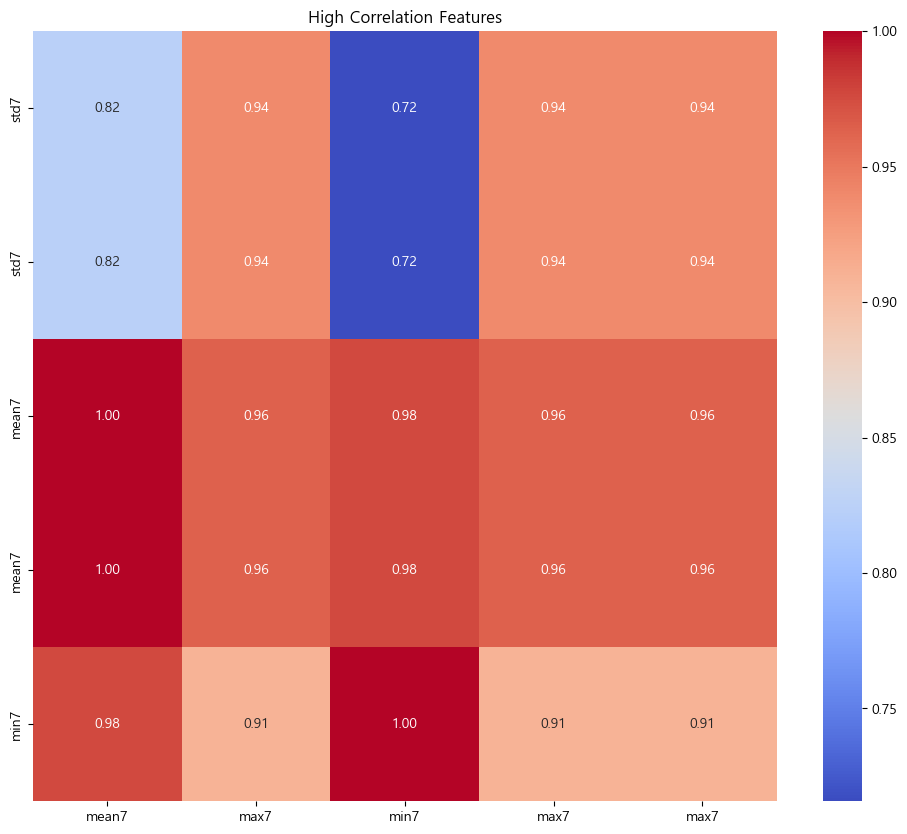

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['sales'])

# 상관 행렬 계산
corr_matrix = X.corr().abs()

# 임계값 설정
threshold = 0.8

# 높은 상관 계수만 필터링
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# 높은 상관 계수 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[[x for x, y in high_corr_var], [y for x, y in high_corr_var]], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('High Correlation Features')
plt.show()


In [12]:
# 높은 상관 계수 특성 쌍 출력
print("Highly correlated features (threshold=0.8):")
for (x, y) in high_corr_var:
    print(f"{x} and {y} -> correlation: {corr_matrix.loc[x, y]}")


Highly correlated features (threshold=0.8):
std7 and mean7 -> correlation: 0.8242310797738058
std7 and max7 -> correlation: 0.9393083746686997
mean7 and min7 -> correlation: 0.9763095948370236
mean7 and max7 -> correlation: 0.9638820035272397
min7 and max7 -> correlation: 0.9095536731819889


In [13]:
import pandas as pd
import numpy as np

X = df.drop(columns=['sales'])
y = df['sales']

# 1. 상관 행렬 계산
corr_matrix = X.corr().abs()

# 2. 상관 계수가 높은 특성 쌍 식별 (예: 0.8 이상인 경우)
threshold = 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. 상관 계수가 높은 특성 중 하나 제거
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
X_reduced = X.drop(columns=to_drop)

# 결과 출력
print(f"Removed columns: {to_drop}")
print(f"Reduced feature set shape: {X_reduced.shape}")


Removed columns: ['mean7', 'min7', 'max7']
Reduced feature set shape: (94050, 143)


## 특성 drop

In [30]:
df

sales  onpromotion  transactions  oil_price  magnitude  deaths  \
721050   59.0            0        2582.0      48.69        0.0     0.0   
721051   73.0            0        2326.0      48.80        0.0     0.0   
721052  136.0            0        2579.0      48.35        0.0     0.0   
721053  142.0            1        2362.0      46.06        0.0     0.0   
721054    0.0            0        1850.0      46.06        0.0     0.0   
...       ...          ...           ...        ...        ...     ...   
846445  197.0            7        1936.0      48.81        0.0     0.0   
846446  177.0            6        1773.0      47.59        0.0     0.0   
846447  284.0            7        1804.0      47.59        0.0     0.0   
846448  222.0            3        1576.0      47.59        0.0     0.0   
846449  181.0            8        1543.0      47.57        0.0     0.0   

        local_holiday  regional_holiday  national_holiday  event_holiday  ...  \
721050              0                 0                 0              0  ...   
721051              0                 0                 0              0  ...   
721052              0                 0                 0              0  ...   
721053              0                 0                 1              0  ...   
721054              0                 0                 0              0  ...   
...               ...               ...               ...            ...  ...   
846445              0                 0                 1              0  ...   
846446              0                 0                 0              0  ...   
846447              0                 0                 0              0  ...   
846448              0                 0                 0              0  ...   
846449              0                 0                 0              0  ...   

        day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
721050                 0.0                   0.0                 0.0   
721051                 0.0                   0.0                 0.0   
721052                 0.0                   0.0                 0.0   
721053                 0.0                   1.0                 0.0   
721054                 0.0                   0.0                 1.0   
...                    ...                   ...                 ...   
846445                 0.0                   0.0                 0.0   
846446                 0.0                   1.0                 0.0   
846447                 0.0                   0.0                 1.0   
846448                 1.0                   0.0                 0.0   
846449                 0.0                   0.0                 0.0   

        day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
721050                   0.0                  0.0                    1.0   
721051                   1.0                  0.0                    0.0   
721052                   0.0                  0.0                    0.0   
721053                   0.0                  0.0                    0.0   
721054                   0.0                  0.0                    0.0   
...                      ...                  ...                    ...   
846445                   0.0                  0.0                    0.0   
846446                   0.0                  0.0                    0.0   
846447                   0.0                  0.0                    0.0   
846448                   0.0                  0.0                    0.0   
846449                   0.0                  1.0                    0.0   

        season_Autumn  season_Spring  season_Summer  season_Winter  
721050            0.0            0.0            0.0            1.0  
721051            0.0            0.0            0.0            1.0  
721052            0.0            0.0            0.0            1.0  
721053            0.0            0.0            0.0            1.0  
721054            0.0  

## pca

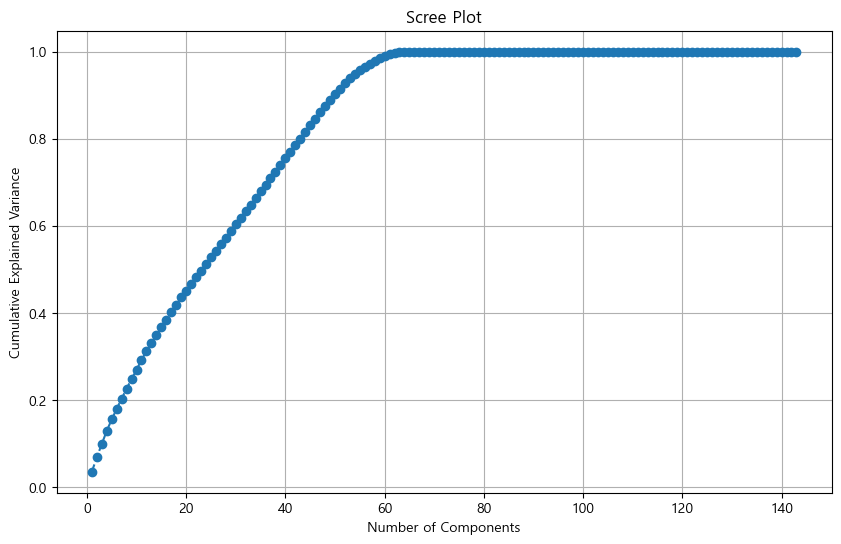

Number of components explaining 95% of the variance: 55


In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 데이터 스케일링 (PCA 적용 전에 꼭 필요)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_reduced)

# PCA 적용
pca = PCA()
pca.fit(data_scaled)

# 설명된 분산 비율
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 스크리 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

# 적절한 주성분의 수 선택 (예: 95%의 분산을 설명하는 주성분의 수)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of the variance: {n_components}") # 28초


In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X = df.drop(columns=['sales'])
#y = df['sales']

X = X_reduced
y = y

# 데이터 스케일링 (PCA 적용 전에 꼭 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (예: 2개의 주성분으로 축소)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 확인
print(f"PCA 결과 ('{n_components}'개의 주성분으로 축소):")
print(X_pca) # 54초


PCA 결과 ('55'개의 주성분으로 축소):
[[ 1.96806247 -1.43881115 -0.25272076 ...  0.89725191  0.39383208
  -0.03301005]
 [ 1.62477596 -1.32339902 -0.33998996 ...  0.86368434  0.44365702
  -0.15128811]
 [ 2.12721552 -1.41087938 -0.25292684 ...  1.01147179  0.33953537
   0.02399418]
 ...
 [ 0.13421446  0.42446054  0.43189943 ... -0.1552943   0.10178445
  -0.05753588]
 [-0.05770766  0.75518707  0.39174686 ... -0.05243127  0.13001246
   0.12131835]
 [ 0.18869584  0.66007819 -1.07207208 ... -1.44696854  0.38409952
  -0.02773562]]


## train_test_split

In [16]:
# 데이터 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## RandomForestRegressor, RandomizedSearchCV

In [34]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

# 하이퍼파라미터 디스트리뷰션 설정
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(np.arange(10, 31, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# 랜덤 포레스트 모델 생성
rf = RandomForestRegressor(random_state=42)

# 랜덤 서치 설정 (병렬 처리 사용, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# 모델 학습
random_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

# 최적 모델로 테스트 데이터 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


## RandomForestRegressor

In [1]:
# 모델 학습 및 평가 (예: 랜덤 포레스트 회귀)
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
model = RandomForestRegressor(random_state=42)


# 모델 학습
model.fit(X_train, y_train)

# 검증 셋을 사용하여 예측
y_val_pred = model.predict(X_val)

# RMSLE 계산 함수 정의
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산 (검증 셋)
rmsle_val = root_mean_squared_log_error(y_val, y_val_pred)
print(f"Validation RMSLE: {rmsle_val}")

# 테스트 셋에 대한 예측 및 평가
y_test_pred = model.predict(X_test)
rmsle_test = root_mean_squared_log_error(y_test, y_test_pred)
print(f"Test RMSLE: {rmsle_test}")

NameError: name 'X_train' is not defined

### RandomForestRegressor --> 결과 RMSLE: 0.15724344451076833

In [64]:
# Default 세팅으로 RandomForest 학습
rf = RandomForestRegressor(random_state = 0)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted) # 예측값이 0보다 작으면 0으로 셋팅
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

ValueError: could not convert string to float: 'LIQUOR,WINE,BEER'

MAPE: inf


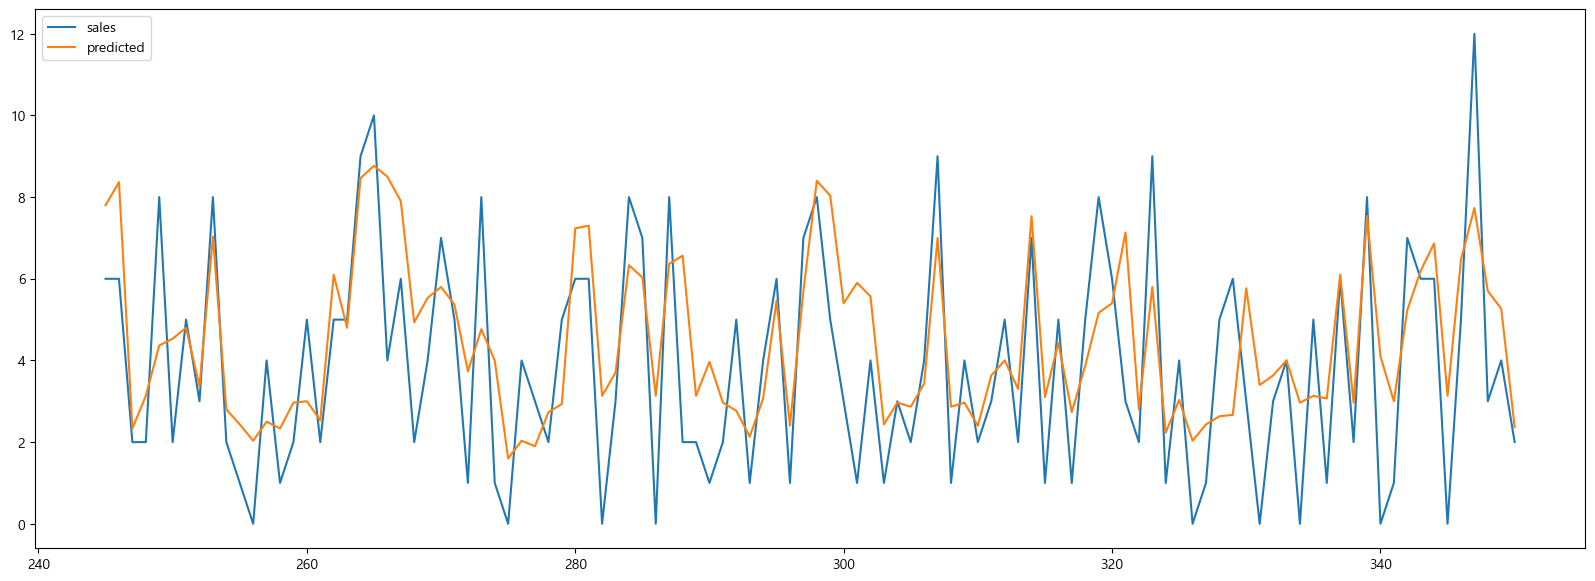

In [177]:
# Under fitting을 조정하기 위한 n_estimator와 max_features만 조정
rf = RandomForestRegressor(random_state = 0, n_estimators=30, max_features=50)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted)# 예측값이 0보다 작으면 0으로 셋팅
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

In [227]:
import numpy as np

def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산
rmsle = root_mean_squared_log_error(test_labels, predicted)
print(f"RMSLE: {rmsle}")


RMSLE: 0.3763313279703559


### XGBOOST --> 결과: RMSLE: 0.15603624756864212

In [130]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 1.0/99.8 MB 9.2 MB/s eta 0:00:11
    --------------------------------------- 2.4/99.8 MB 15.0 MB/s eta 0:00:07
   - -------------------------------------- 3.8/99.8 MB 18.7 MB/s eta 0:00:06
   - -------------------------------------- 4.8/99.8 MB 21.6 MB/s eta 0:00:05
   -- ------------------------------------- 5.3/99.8 MB 17.7 MB/s eta 0:00:06
   -- ------------------------------------- 5.9/99.8 MB 18.0 MB/s eta 0:00:06
   -- ------------------------------------- 6.8/99.8 MB 18.1 MB/s eta 0:00:06
   --- ------------------------------------ 8.6/99.8 MB 20.2 MB/s eta 0:00:05
   --- ------------------------------------ 8.8/99.8 MB 18.8 MB/s eta 0:00:05
   --- ------------------------------------ 9.4/99.8 MB 18.1 MB/s eta 0:00:05
   -

        actual   predicted
13305  213.893  213.266464
13306  143.101  171.192230
13307  160.485  160.531769
13308  112.673  107.860626
13309  119.519  102.286179


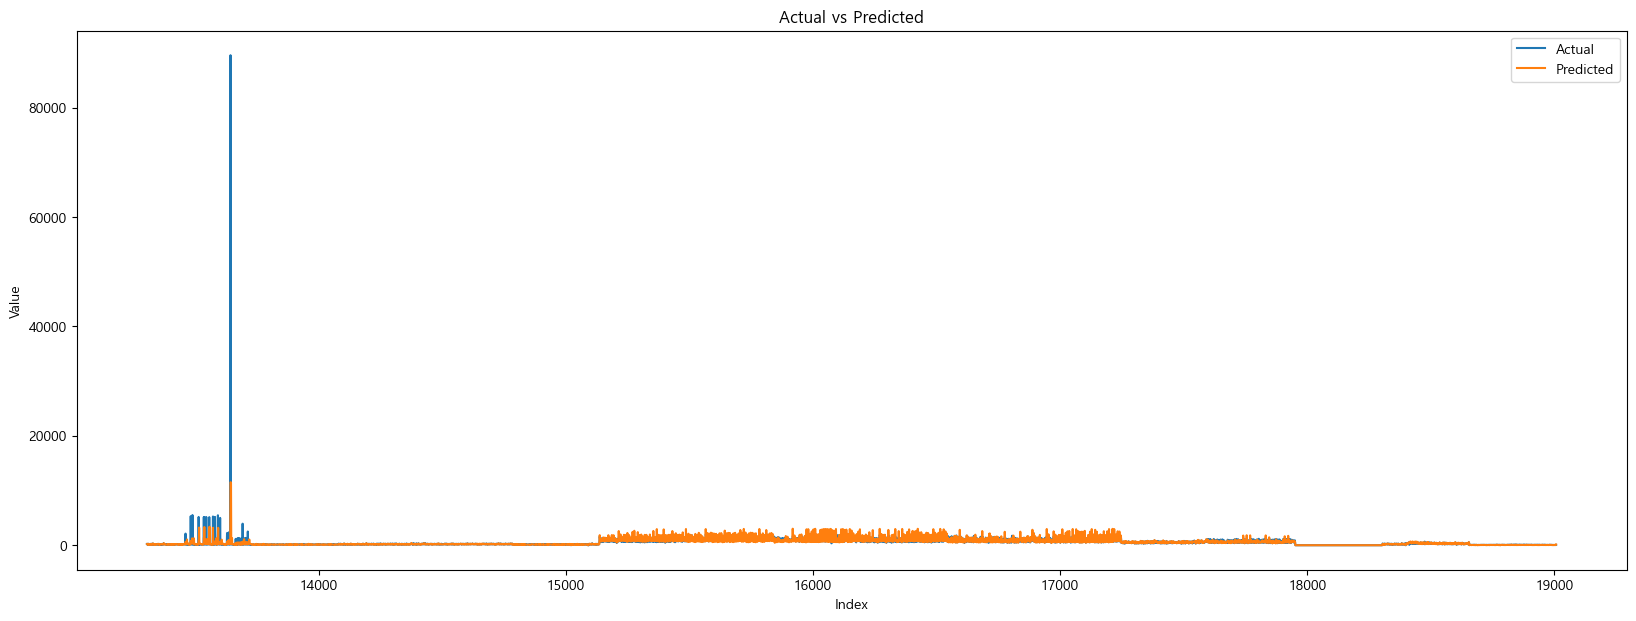

RMSLE: 0.34211343466383604


In [228]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# XGBoost 모델 학습
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
xg_reg.fit(train_features, train_labels)

# 예측
predicted = xg_reg.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted)# 예측값이 0보다 작으면 0으로 셋팅

# test_labels를 Pandas Series로 변환
test_labels_series = pd.Series(test_labels, name='actual')

# 예측 결과 DataFrame 생성
pdf = pd.DataFrame({'actual': test_labels_series, 'predicted': predicted})

# 데이터 확인
print(pdf.head())

# 플롯
pdf.plot(figsize=(20, 7))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()

# RMSLE 계산 함수
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산
rmsle = root_mean_squared_log_error(test_labels_series, predicted)
print(f"RMSLE: {rmsle}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-0.69623418 -0.69681197 -0.69804289 -0.57480166 -0.57242985 -0.57186867
 -0.52055239 -0.51924965 -0.51905552 -0.68183235 -0.6844516  -0.68456973
 -0.53942623 -0.54337933 -0.54447457 -0.48633264 -0.49292397 -0.49497147
 -0.69613505 -0.69808907 -0.69832085 -0.55777849 -0.560969   -0.557343
 -0.50363034 -0.50629329 -0.50220994 -0.47252228 -0.46970574 -0.46088861
 -0.44797891 -0.44574586 -0.43680078 -0.44469948 -0.43849092 -0.43217813
 -0.46812034 -0.46971506 -0.46574951 -0.44656629 -0.45259484 -0.44465185
 -0.44381699 -0.44890694 -0.44280473 -0.49342569 -0.49694722 -0.48784535
 -0.4837941  -0.48240294 -0.47409422 -0.47847156 -0.48396242 -0.46832369
 -0.44191494 -0.45609413 -0.44523916         nan -0.43895665 -0.43715109
         nan -0.44272389         nan -0.46763038 -0.45639641 -0.44679078
 -0.45883016 -0.45573934 -

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best RMSLE score:  0.41821457748954877
        actual   predicted
13305  213.893  213.339493
13306  143.101  166.810120
13307  160.485  166.604614
13308  112.673  124.094460
13309  119.519  106.561424


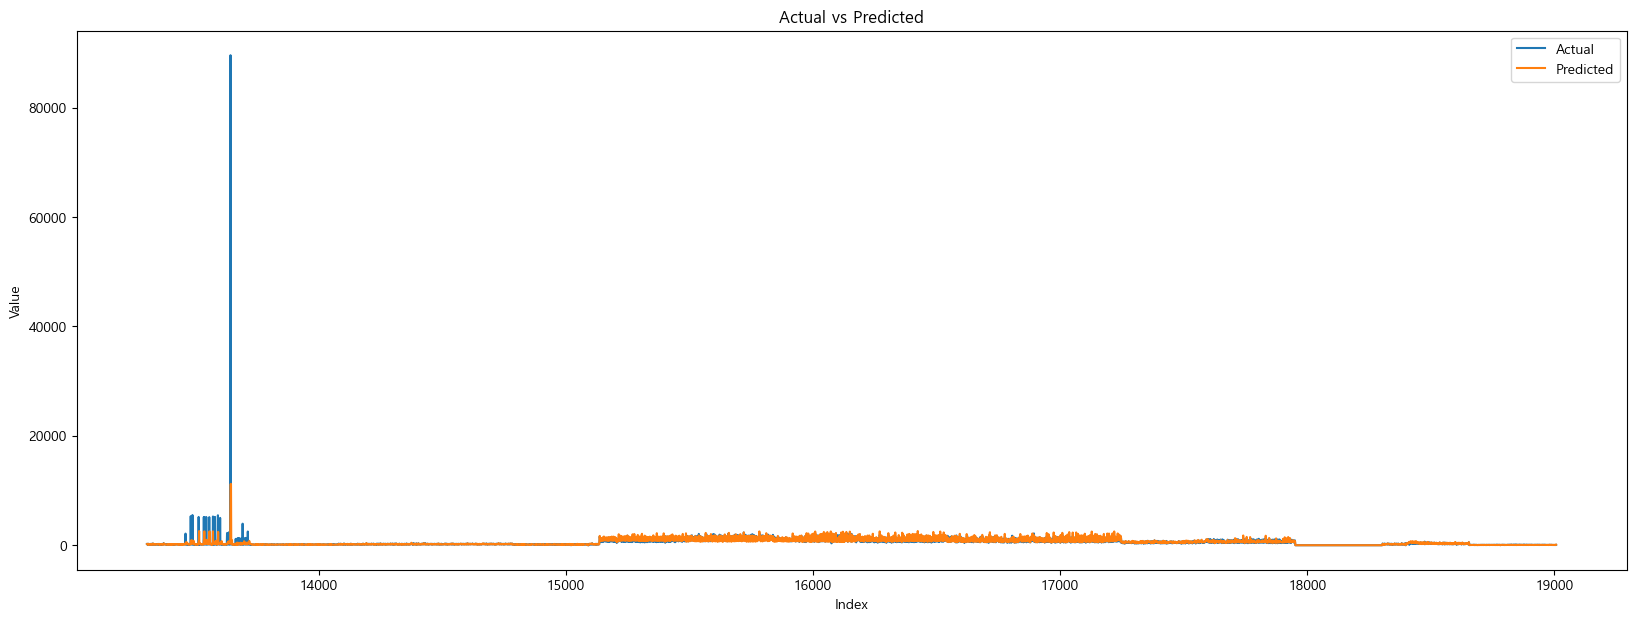

RMSLE: 0.34712185847899457


In [229]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
import matplotlib.pyplot as plt

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# XGBoost 모델 생성
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# GridSearchCV 수행
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring=rmsle_scorer, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(train_features, train_labels)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSLE score: ", -grid_search.best_score_)

# 최적의 하이퍼파라미터로 모델 생성
best_xg_reg = grid_search.best_estimator_

# 예측
predicted = best_xg_reg.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted)# 예측값이 0보다 작으면 0으로 셋팅

# test_labels를 Pandas Series로 변환
test_labels_series = pd.Series(test_labels, name='actual')

# 예측 결과 DataFrame 생성
pdf = pd.DataFrame({'actual': test_labels_series, 'predicted': predicted})

# 데이터 확인
print(pdf.head())

# 플롯
pdf.plot(figsize=(20, 7))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()

# RMSLE 계산 함수
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산
rmsle = root_mean_squared_log_error(test_labels_series, predicted)
print(f"RMSLE: {rmsle}")


## 보류

In [ ]:
for i in range(1, 55):
    for j in unique_families:
        globals()[f'S{i:02d}_{j}'].to_csv(r"C:\Users\user\upstage3-python\09.ML_project_team03\globals()[f'S{i:02d}_{j}'].csv", index=False)

## Handling Multicollinearity: 특정 상점 corr 탐색 
corr의 경우 복잡한 family 요인같은 걸 지우는게 sales 예측에 도움이 된다.
deaths와 magnitude는 0.57로 상관관계가 높으므로 하나의 변수를 삭제한다.

In [257]:
temp.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'transactions', 'day_of_week', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday', 'event_holiday'],
      dtype='object')

In [320]:
sales19= temp[temp['store_nbr']==19][['date','sales']].groupby('date').sum('sales')
sales19.reset_index(drop=False, inplace=True)
others19= temp[temp['store_nbr']==19][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others19.drop_duplicates(inplace=True)
sales19['date'] = pd.to_datetime(sales19['date'])
others19['date'] = pd.to_datetime(others19['date'])
temp19= pd.merge(sales19, others19, how='left', on='date')


In [353]:
sales53= temp[temp['store_nbr']==53][['date','sales']].groupby('date').sum('sales')
sales53.reset_index(drop=False, inplace=True)
others53= temp[temp['store_nbr']==53][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others53.drop_duplicates(inplace=True)
sales53['date'] = pd.to_datetime(sales53['date'])
others53['date'] = pd.to_datetime(others53['date'])
temp53= pd.merge(sales53, others53, how='left', on='date')


C:\Users\user\AppData\Local\Temp\ipykernel_39496\70525392.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp53.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

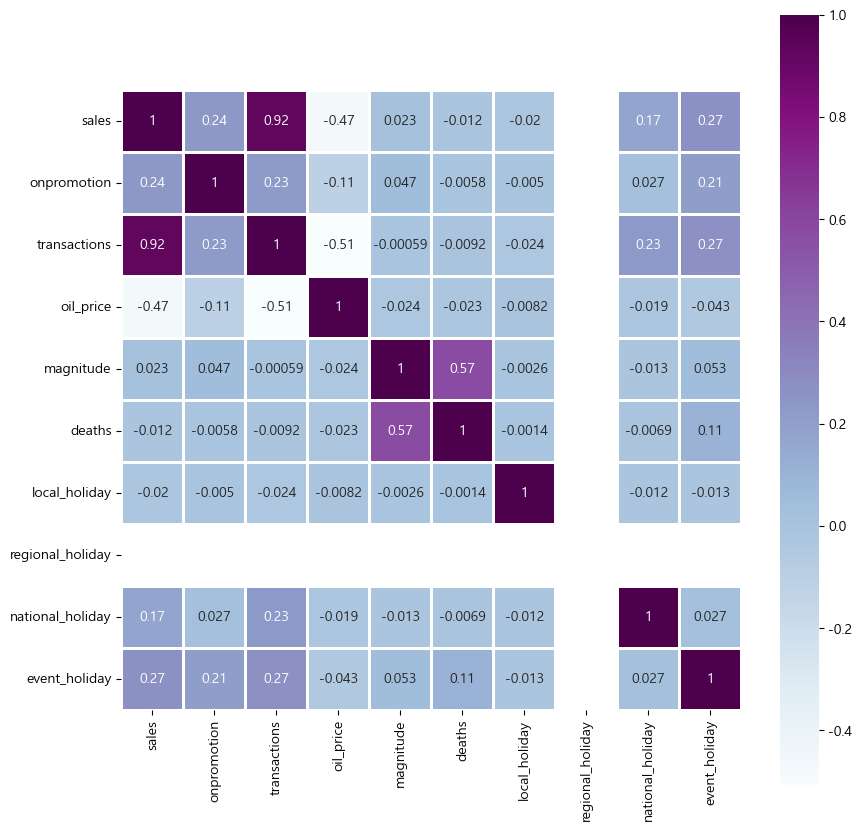

In [354]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp53.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

C:\Users\user\AppData\Local\Temp\ipykernel_39496\3779788102.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp[temp['store_nbr']==53].corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

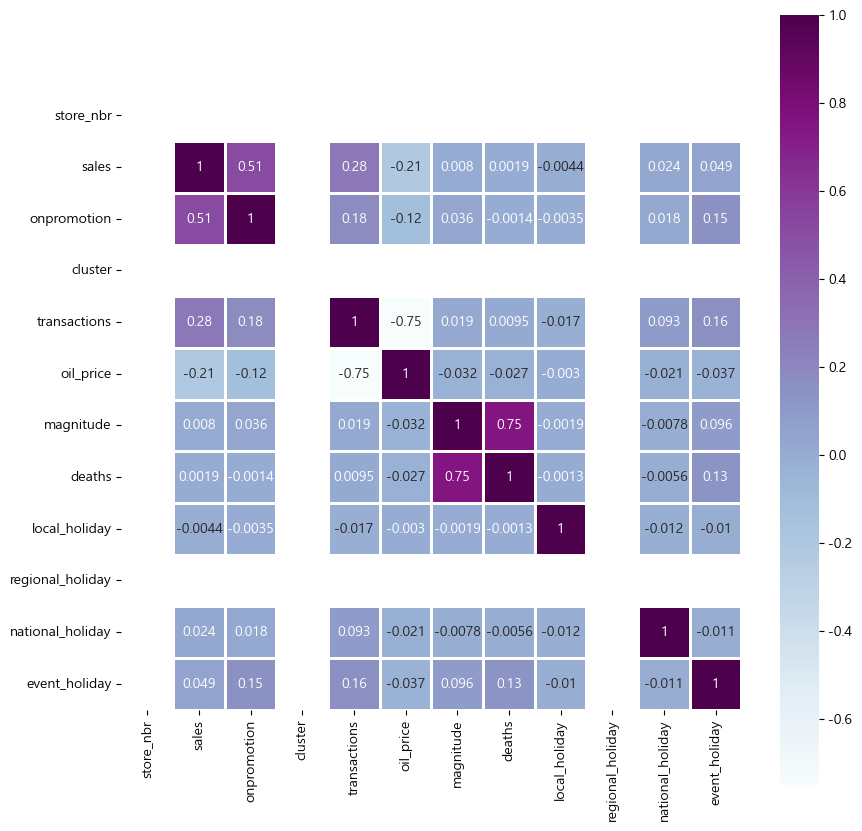

In [349]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp[temp['store_nbr']==53].corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

In [ ]:
PRODUCE, PREPARED FOODS

In [386]:
sales53_2= temp[(temp['store_nbr']==53)&(temp['family']=='POULTRY')][['date','sales']].groupby('date').sum('sales')
sales53_2.reset_index(drop=False, inplace=True)
others53_2= temp[(temp['store_nbr']==53)&(temp['family']=='POULTRY')][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others53_2.drop_duplicates(inplace=True)
sales53_2['date'] = pd.to_datetime(sales53_2['date'])
others53_2['date'] = pd.to_datetime(others53_2['date'])
temp53_2= pd.merge(sales53_2, others53_2, how='left', on='date')

C:\Users\user\AppData\Local\Temp\ipykernel_39496\4221428806.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp53_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

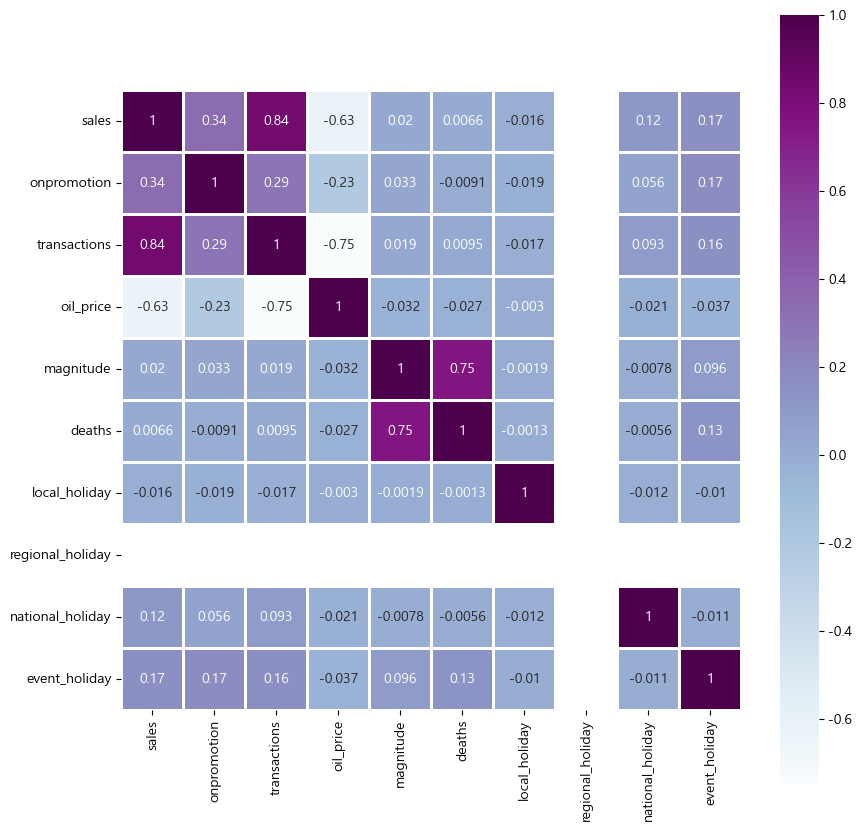

In [388]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp53_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

In [365]:
sales19_2= temp[(temp['store_nbr']==19)&(temp['family']=='POULTRY')][['date','sales']].groupby('date').sum('sales')
sales19_2.reset_index(drop=False, inplace=True)
others19_2= temp[(temp['store_nbr']==19)&(temp['family']=='POULTRY')][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others19_2.drop_duplicates(inplace=True)
sales19_2['date'] = pd.to_datetime(sales19_2['date'])
others19_2['date'] = pd.to_datetime(others19_2['date'])
temp19_2= pd.merge(sales19_2, others19_2, how='left', on='date')

C:\Users\user\AppData\Local\Temp\ipykernel_39496\1969962390.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp19_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

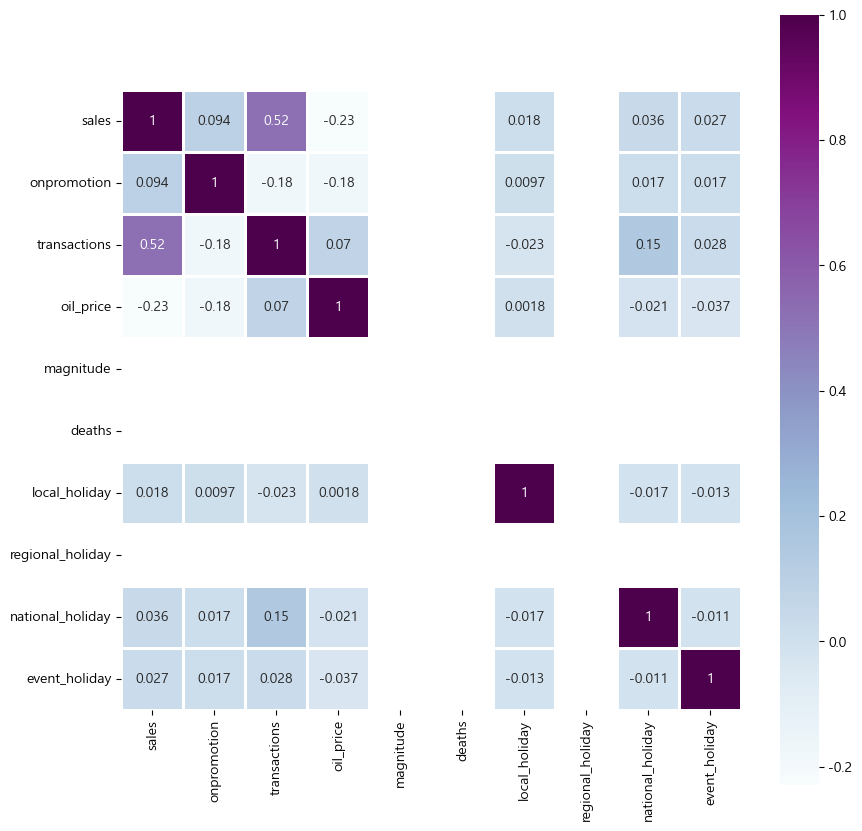

In [366]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp19_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

## Handling Multicollinearity:  VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 데이터 준비 (sales 제외)
X = df.drop(columns=['sales'])

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


## 요일별 매출 탐색

In [371]:
temp19_2013 = temp19[temp19['date'].dt.year==2013]
temp19_2014 = temp19[temp19['date'].dt.year==2014]
temp19_2015 = temp19[temp19['date'].dt.year==2015]
temp19_2016 = temp19[temp19['date'].dt.year==2016]
temp19_2017 = temp19[temp19['date'].dt.year==2017]

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


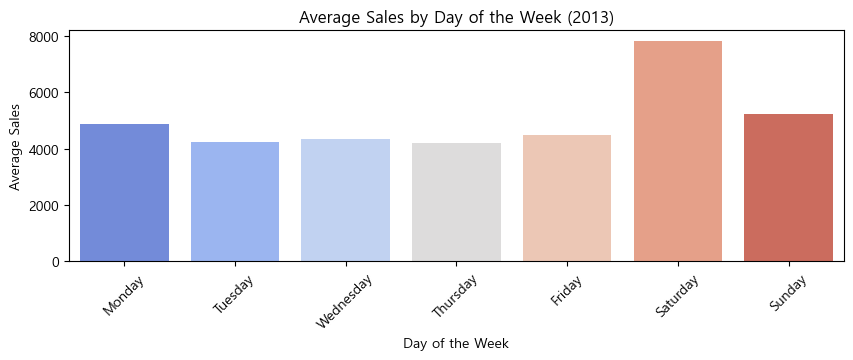

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


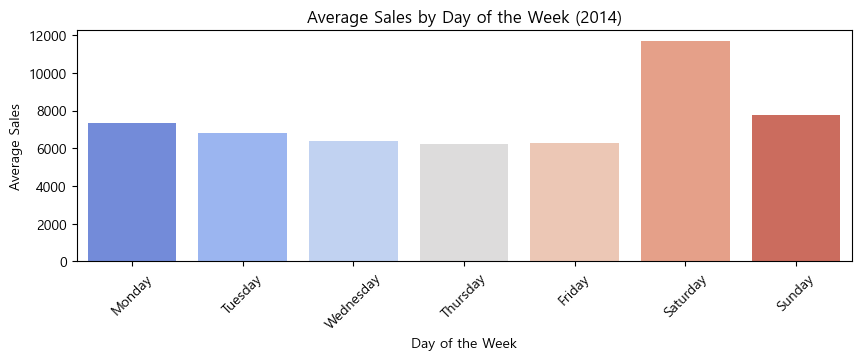

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


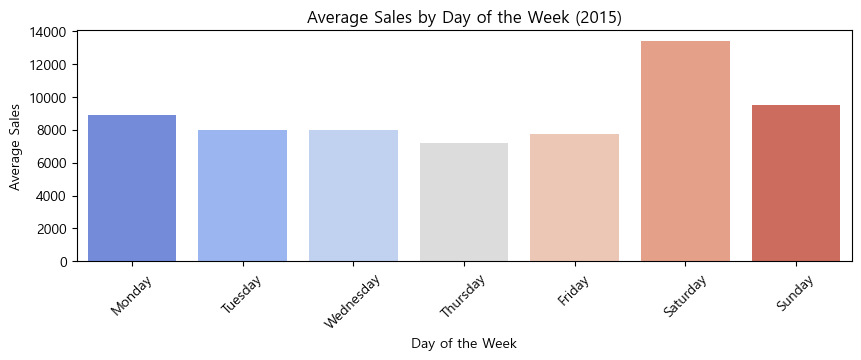

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


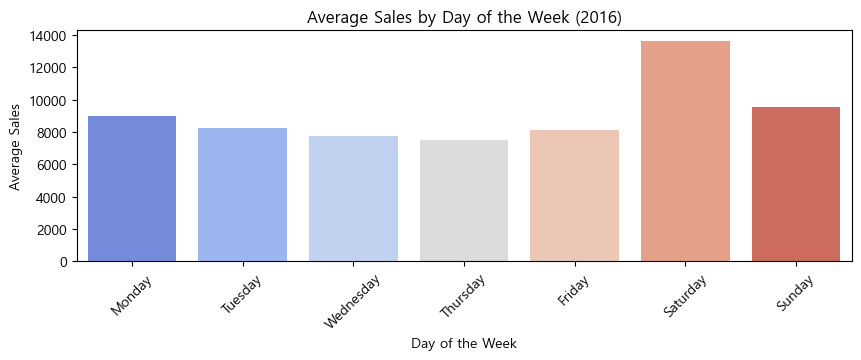

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


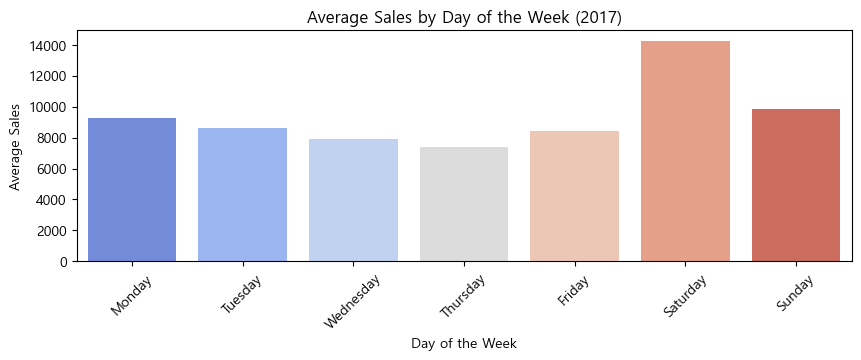

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(2013,2018):

    # 요일별 매출 집계
    sales_by_day = globals()[f'temp19_{i}'].groupby('day_of_week')['sales'].mean().reset_index()

    # 요일 순서 정렬
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)
    sales_by_day = sales_by_day.sort_values('day_of_week')

    # 요일별 매출 시각화
    plt.figure(figsize=(10, 3))
    sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')
    plt.title(f'Average Sales by Day of the Week ({i})')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.show()


## 시간 시계열 데이터의 경우 ARIMA, Prophet, LSTM